# Installs & Imports

In [1]:
!pip install -q sktime pyts

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

from sktime.datasets import load_basic_motions
from sktime.classification.kernel_based import RocketClassifier
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.interval_based import DrCIF
from sktime.classification.deep_learning.cnn import CNNClassifier
from sktime.classification.deep_learning.lstmfcn import LSTMFCNClassifier
from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.transformations.panel.catch22 import Catch22
from sktime.pipeline import make_pipeline as sktime_make_pipe

from pyts.classification import SAXVSM, BOSSVS, LearningShapelets, TimeSeriesForest
from pyts.image import GramianAngularField, RecurrencePlot, MarkovTransitionField
from pyts.multivariate.transformation import MultivariateTransformer, WEASELMUSE
from pyts.multivariate.classification import MultivariateClassifier

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline as sklearn_make_pipe

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [3]:
# Load the data
X_train, y_train = load_basic_motions(split="train", return_type="numpy3d")
X_test, y_test = load_basic_motions(split="test", return_type="numpy3d")
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (40, 6, 100)
Shape of y_train:  (40,)
Shape of X_test:  (40, 6, 100)
Shape of y_test:  (40,)


# Data Exploration

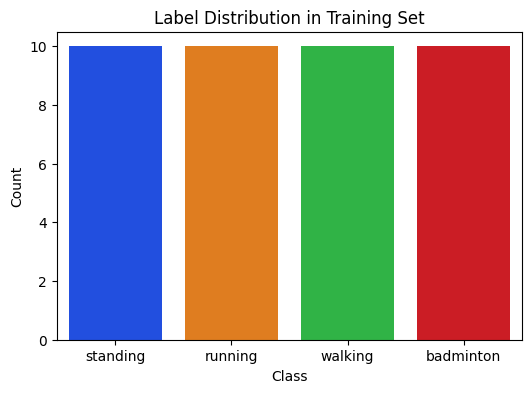

In [4]:
# Label Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='bright')
plt.title('Label Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

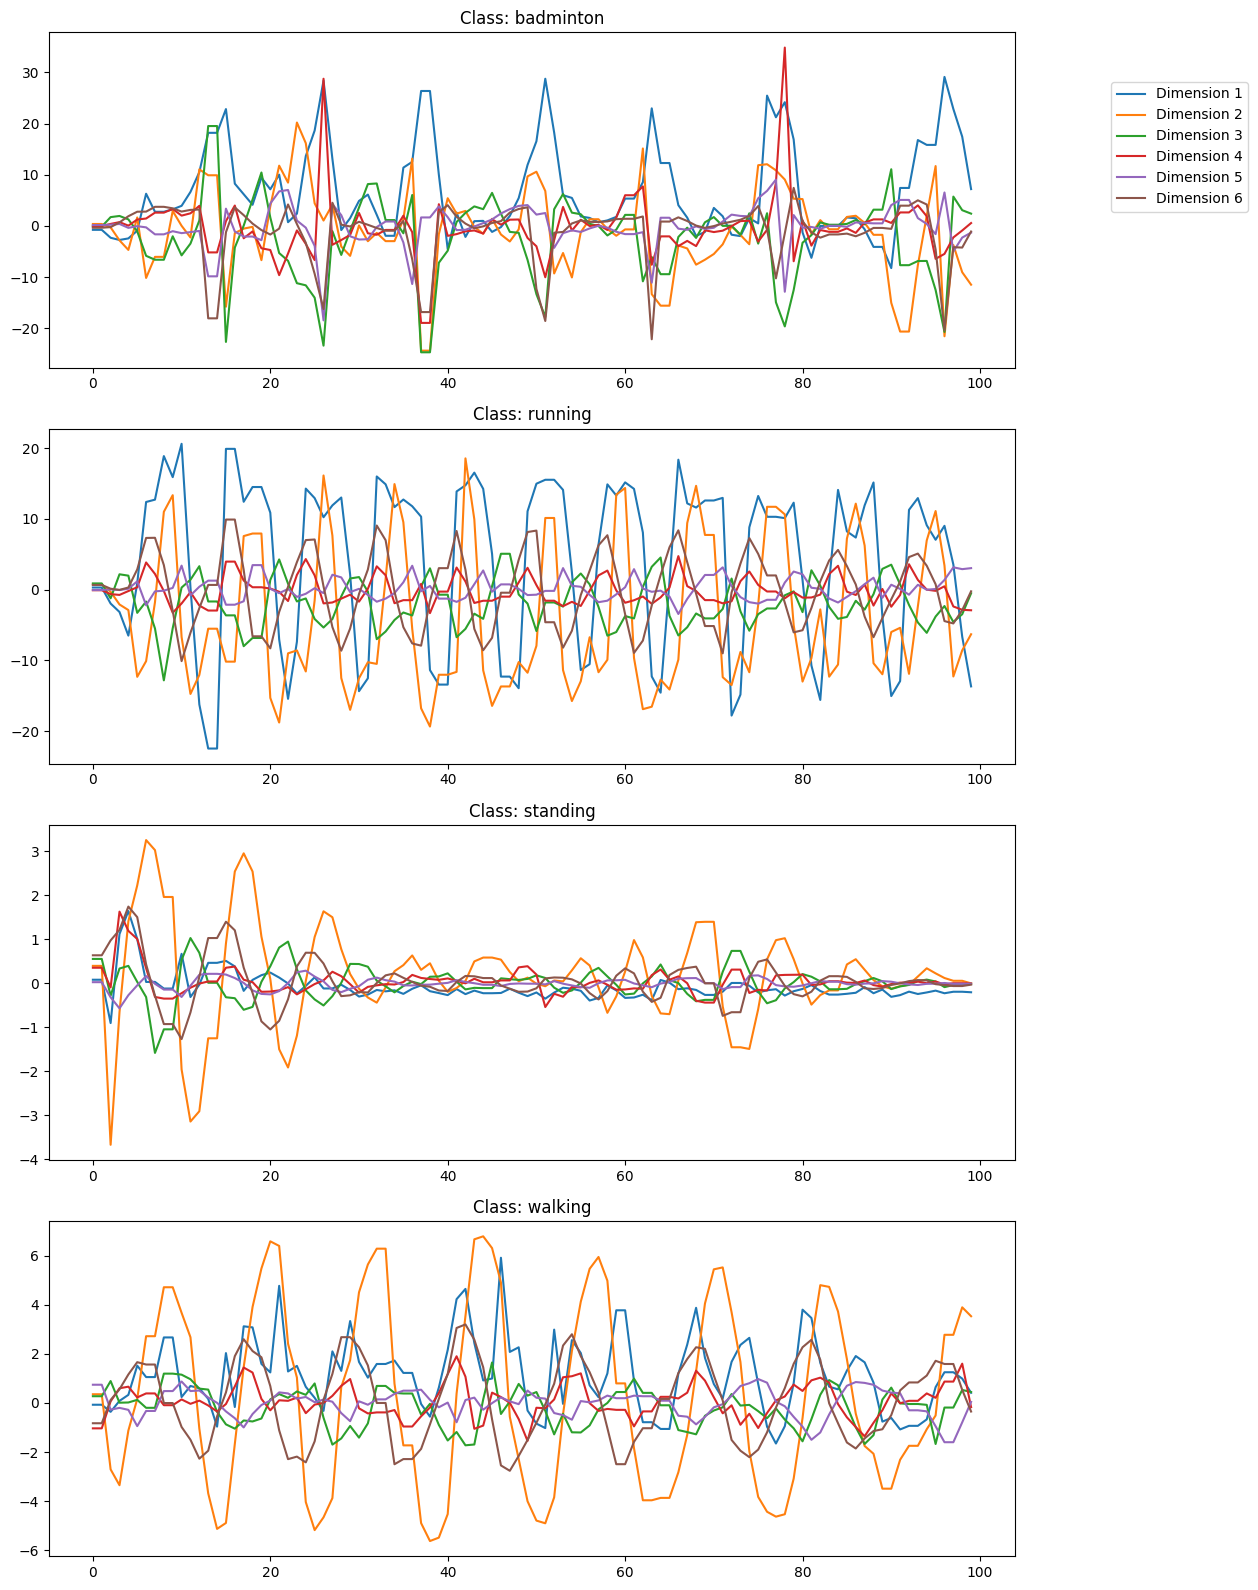

In [5]:
# Sample Time Series Plots
classes = np.unique(y_train)
n_classes = len(classes)

# Subplot creation for single or multiple classes
if n_classes == 1:
    fig, axes = plt.subplots(1, 1, figsize=(12, 4))
    axes = [axes]  # Make it iterable
else:
    fig, axes = plt.subplots(n_classes, 1, figsize=(12, 4 * n_classes))

# Initialize handles and labels for the global legend
handles = []
labels = []

for idx, cls in enumerate(classes):
    cls_indices = np.where(y_train == cls)[0]
    if len(cls_indices) == 0:
        continue
    cls_sample = X_train[cls_indices[0]]  # Accessing the data from X_train
    for dim in range(cls_sample.shape[0]):
        line, = axes[idx].plot(cls_sample[dim], label=f'Dimension {dim+1}')
        # Collect handles and labels only once from the first subplot
        if idx == 0:
            handles.append(line)
            labels.append(f'Dimension {dim+1}')
    axes[idx].set_title(f'Class: {cls}')

# Add a global legend to the right of all subplots
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 0.95))
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

# Training & Evaluation

In [6]:
# Encode the labels for XGBoost models
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

## ROCKET

In [7]:
# Fit ROCKET estimator
rocket = RocketClassifier(num_kernels=2000)
rocket.fit(X_train, y_train)
y_pred_rocket = rocket.predict(X_test)
rocket_acc = accuracy_score(y_test, y_pred_rocket)
rocket_prec = precision_score(y_test, y_pred_rocket, average='macro')
rocket_rec = recall_score(y_test, y_pred_rocket, average='macro')
rocket_f1 = f1_score(y_test, y_pred_rocket, average='macro')

In [8]:
# Print metrics
print("Accuracy of ROCKET:", rocket_acc)
print("Precision of ROCKET:", rocket_prec)
print("Recall of ROCKET:", rocket_rec)
print("F1 Score of ROCKET:", rocket_f1)

Accuracy of ROCKET: 1.0
Precision of ROCKET: 1.0
Recall of ROCKET: 1.0
F1 Score of ROCKET: 1.0


## HIVECOTEV2

In [9]:
# Fit HIVECOTEV2 estimator
hc2 = HIVECOTEV2(time_limit_in_minutes=0.2)
hc2.fit(X_train, y_train)
y_pred_hc2 = hc2.predict(X_test)
hc2_acc = accuracy_score(y_test, y_pred_hc2)
hc2_prec = precision_score(y_test, y_pred_hc2, average='macro')
hc2_rec = recall_score(y_test, y_pred_hc2, average='macro')
hc2_f1 = f1_score(y_test, y_pred_hc2, average='macro')

In [10]:
# Print metrics
print("Accuracy of HIVECOTEV2:", hc2_acc)
print("Precision of HIVECOTEV2:", hc2_prec)
print("Recall of HIVECOTEV2:", hc2_rec)
print("F1 Score of HIVECOTEV2:", hc2_f1)

Accuracy of HIVECOTEV2: 1.0
Precision of HIVECOTEV2: 1.0
Recall of HIVECOTEV2: 1.0
F1 Score of HIVECOTEV2: 1.0


## DrCIF

In [11]:
# Fit DrCIF estimator
drcif = ColumnConcatenator() * DrCIF(n_estimators=10, n_intervals=5)
drcif.fit(X_train, y_train)
y_pred_drcif = drcif.predict(X_test)
drcif_acc = accuracy_score(y_test, y_pred_drcif)
drcif_prec = precision_score(y_test, y_pred_drcif, average='macro')
drcif_rec = recall_score(y_test, y_pred_drcif, average='macro')
drcif_f1 = f1_score(y_test, y_pred_drcif, average='macro')

In [12]:
# Print metrics
print("Accuracy of DrCIF:", drcif_acc)
print("Precision of DrCIF:", drcif_prec)
print("Recall of DrCIF:", drcif_rec)
print("F1 Score of DrCIF:", drcif_f1)

Accuracy of DrCIF: 1.0
Precision of DrCIF: 1.0
Recall of DrCIF: 1.0
F1 Score of DrCIF: 1.0


## CNN

In [13]:
# Fit CNN estimator
cnn = ColumnConcatenator() * CNNClassifier(n_epochs=20, batch_size=4)
cnn.fit(X_train, y_train)
y_pred_cnn = cnn.predict(X_test)
cnn_acc = accuracy_score(y_test, y_pred_cnn)
cnn_prec = precision_score(y_test, y_pred_cnn, average='macro')
cnn_rec = recall_score(y_test, y_pred_cnn, average='macro')
cnn_f1 = f1_score(y_test, y_pred_cnn, average='macro')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [14]:
# Print metrics
print("Accuracy of CNN:", cnn_acc)
print("Precision of CNN:", cnn_prec)
print("Recall of CNN:", cnn_rec)
print("F1 Score of CNN:", cnn_f1)

Accuracy of CNN: 1.0
Precision of CNN: 1.0
Recall of CNN: 1.0
F1 Score of CNN: 1.0


## LSTMFCN

In [15]:
# Fit LSTMFCN estimator
lstmfcn = ColumnConcatenator() * LSTMFCNClassifier(n_epochs=20, batch_size=4)
lstmfcn.fit(X_train, y_train)
y_pred_lstmfcn = lstmfcn.predict(X_test)
lstmfcn_acc = accuracy_score(y_test, y_pred_lstmfcn)
lstmfcn_prec = precision_score(y_test, y_pred_lstmfcn, average='macro')
lstmfcn_rec = recall_score(y_test, y_pred_lstmfcn, average='macro')
lstmfcn_f1 = f1_score(y_test, y_pred_lstmfcn, average='macro')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [16]:
# Print metrics
print("Accuracy of LSTMFCN:", lstmfcn_acc)
print("Precision of LSTMFCN:", lstmfcn_prec)
print("Recall of LSTMFCN:", lstmfcn_rec)
print("F1 Score of LSTMFCN:", lstmfcn_f1)

Accuracy of LSTMFCN: 1.0
Precision of LSTMFCN: 1.0
Recall of LSTMFCN: 1.0
F1 Score of LSTMFCN: 1.0


## XGBoost

In [17]:
# Flatten the inputs
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [18]:
# Fit XGBoost estimator
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_flat, y_train_encoded)
y_pred_xgb = xgb.predict(X_test_flat)
xgb_acc = accuracy_score(y_test_encoded, y_pred_xgb)
xgb_prec = precision_score(y_test_encoded, y_pred_xgb, average='macro')
xgb_rec = recall_score(y_test_encoded, y_pred_xgb, average='macro')
xgb_f1 = f1_score(y_test_encoded, y_pred_xgb, average='macro')

In [19]:
# Print metrics
print("Accuracy of XGBoost:", round(xgb_acc, 3))
print("Precision of XGBoost:", round(xgb_prec, 3))
print("Recall of XGBoost:", round(xgb_rec, 3))
print("F1 Score of XGBoost:", round(xgb_f1, 3))

Accuracy of XGBoost: 0.825
Precision of XGBoost: 0.844
Recall of XGBoost: 0.825
F1 Score of XGBoost: 0.826


## Catch22 + XGBoost

In [20]:
# Fit Catch22 + XGBoost
catch22 = ColumnConcatenator() * Catch22()
xgb = XGBClassifier(n_estimators=100)
c22xgb = sktime_make_pipe(catch22, xgb)
c22xgb.fit(X_train, y_train_encoded)
y_pred_c22xgb = c22xgb.predict(X_test)
c22xgb_acc = accuracy_score(y_test_encoded, y_pred_c22xgb)
c22xgb_prec = precision_score(y_test_encoded, y_pred_c22xgb, average='macro')
c22xgb_rec = recall_score(y_test_encoded, y_pred_c22xgb, average='macro')
c22xgb_f1 = f1_score(y_test_encoded, y_pred_c22xgb, average='macro')

In [21]:
# Print metrics
print("Accuracy of Catch22 + XGBoost:", round(c22xgb_acc, 3))
print("Precision of Catch22 + XGBoost:", round(c22xgb_prec, 3))
print("Recall of Catch22 + XGBoost:", round(c22xgb_rec, 3))
print("F1 Score of Catch22 + XGBoost:", round(c22xgb_f1, 3))

Accuracy of Catch22 + XGBoost: 0.975
Precision of Catch22 + XGBoost: 0.977
Recall of Catch22 + XGBoost: 0.975
F1 Score of Catch22 + XGBoost: 0.975


## SAXVSM

In [22]:
# Fit SAXVSM estimator
saxvsm = MultivariateClassifier(SAXVSM(window_size=0.05, sublinear_tf=False, use_idf=False))
saxvsm.fit(X_train, y_train)
y_pred_saxvsm = saxvsm.predict(X_test)
saxvsm_acc = accuracy_score(y_test, y_pred_saxvsm)
saxvsm_prec = precision_score(y_test, y_pred_saxvsm, average='macro')
saxvsm_rec = recall_score(y_test, y_pred_saxvsm, average='macro')
saxvsm_f1 = f1_score(y_test, y_pred_saxvsm, average='macro')

In [23]:
# Print metrics
print("Accuracy of SAXVSM:", round(saxvsm_acc, 3))
print("Precision of SAXVSM:", round(saxvsm_prec, 3))
print("Recall of SAXVSM:", round(saxvsm_rec, 3))
print("F1 Score of SAXVSM:", round(saxvsm_f1, 3))

Accuracy of SAXVSM: 0.9
Precision of SAXVSM: 0.899
Recall of SAXVSM: 0.9
F1 Score of SAXVSM: 0.897


## BOSSVS

In [24]:
# Fit BOSSVS estimator
bossvs = MultivariateClassifier(BOSSVS(window_size=20))
bossvs.fit(X_train, y_train)
y_pred_bossvs = bossvs.predict(X_test)
bossvs_acc = accuracy_score(y_test, y_pred_bossvs)
bossvs_prec = precision_score(y_test, y_pred_bossvs, average='macro')
bossvs_rec = recall_score(y_test, y_pred_bossvs, average='macro')
bossvs_f1 = f1_score(y_test, y_pred_bossvs, average='macro')

In [25]:
# Print metrics
print("Accuracy of BOSSVS:", round(bossvs_acc, 3))
print("Precision of BOSSVS:", round(bossvs_prec, 3))
print("Recall of BOSSVS:", round(bossvs_rec, 3))
print("F1 Score of BOSSVS:", round(bossvs_f1, 3))

Accuracy of BOSSVS: 1.0
Precision of BOSSVS: 1.0
Recall of BOSSVS: 1.0
F1 Score of BOSSVS: 1.0


## LearningShapelets

In [26]:
# Fit LearningShapelets estimator
ls = MultivariateClassifier(LearningShapelets(tol=0.01))
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)
ls_acc = accuracy_score(y_test, y_pred_ls)
ls_prec = precision_score(y_test, y_pred_ls, average='macro')
ls_rec = recall_score(y_test, y_pred_ls, average='macro')
ls_f1 = f1_score(y_test, y_pred_ls, average='macro')

In [27]:
# Print metrics
print("Accuracy of LearningShapelets:", round(ls_acc, 3))
print("Precision of LearningShapelets:", round(ls_prec, 3))
print("Recall of LearningShapelets:", round(ls_rec, 3))
print("F1 Score of LearningShapelets:", round(ls_f1, 3))

Accuracy of LearningShapelets: 0.75
Precision of LearningShapelets: 0.625
Recall of LearningShapelets: 0.75
F1 Score of LearningShapelets: 0.667


## TimeSeriesForest

In [28]:
# Fit TimeSeriesForest estimator
tsf = MultivariateClassifier(TimeSeriesForest())
tsf.fit(X_train, y_train)
y_pred_tsf = tsf.predict(X_test)
tsf_acc = accuracy_score(y_test, y_pred_tsf)
tsf_prec = precision_score(y_test, y_pred_tsf, average='macro')
tsf_rec = recall_score(y_test, y_pred_tsf, average='macro')
tsf_f1 = f1_score(y_test, y_pred_tsf, average='macro')

In [29]:
# Print metrics
print("Accuracy of TimeSeriesForest:", round(tsf_acc, 3))
print("Precision of TimeSeriesForest:", round(tsf_prec, 3))
print("Recall of TimeSeriesForest:", round(tsf_rec, 3))
print("F1 Score of TimeSeriesForest:", round(tsf_f1, 3))

Accuracy of TimeSeriesForest: 1.0
Precision of TimeSeriesForest: 1.0
Recall of TimeSeriesForest: 1.0
F1 Score of TimeSeriesForest: 1.0


## GAF + XGBoost

In [30]:
# Fit GAF + XGBoost
gaf = MultivariateTransformer(GramianAngularField(flatten=True, method="summation", image_size=1.0, overlapping=True))
xgb = XGBClassifier(n_estimators=100)
gafxgb = sklearn_make_pipe(gaf, xgb)
gafxgb.fit(X_train, y_train_encoded)
y_pred_gafxgb = gafxgb.predict(X_test)
gafxgb_acc = accuracy_score(y_test_encoded, y_pred_gafxgb)
gafxgb_prec = precision_score(y_test_encoded, y_pred_gafxgb, average='macro')
gafxgb_rec = recall_score(y_test_encoded, y_pred_gafxgb, average='macro')
gafxgb_f1 = f1_score(y_test_encoded, y_pred_gafxgb, average='macro')

In [31]:
# Print metrics
print("Accuracy of GAF + XGBoost:", round(gafxgb_acc, 3))
print("Precision of GAF + XGBoost:", round(gafxgb_prec, 3))
print("Recall of GAF + XGBoost:", round(gafxgb_rec, 3))
print("F1 Score of GAF + XGBoost:", round(gafxgb_f1, 3))

Accuracy of GAF + XGBoost: 0.525
Precision of GAF + XGBoost: 0.524
Recall of GAF + XGBoost: 0.525
F1 Score of GAF + XGBoost: 0.519


## RP + XGBoost

In [32]:
# Fit RP + XGBoost
rp = MultivariateTransformer(RecurrencePlot(flatten=True, dimension=15, time_delay=3))
xgb = XGBClassifier(n_estimators=100)
rpxgb = sklearn_make_pipe(rp, xgb)
rpxgb.fit(X_train, y_train_encoded)
y_pred_rpxgb = rpxgb.predict(X_test)
rpxgb_acc = accuracy_score(y_test_encoded, y_pred_rpxgb)
rpxgb_prec = precision_score(y_test_encoded, y_pred_rpxgb, average='macro')
rpxgb_rec = recall_score(y_test_encoded, y_pred_rpxgb, average='macro')
rpxgb_f1 = f1_score(y_test_encoded, y_pred_rpxgb, average='macro')

In [33]:
# Print metrics
print("Accuracy of RP + XGBoost:", round(rpxgb_acc, 3))
print("Precision of RP + XGBoost:", round(rpxgb_prec, 3))
print("Recall of RP + XGBoost:", round(rpxgb_rec, 3))
print("F1 Score of RP + XGBoost:", round(rpxgb_f1, 3))

Accuracy of RP + XGBoost: 0.825
Precision of RP + XGBoost: 0.845
Recall of RP + XGBoost: 0.825
F1 Score of RP + XGBoost: 0.822


## MTF + XGBoost

In [34]:
# Fit MTF + XGBoost
mtf = MultivariateTransformer(MarkovTransitionField(flatten=True, image_size=1.0, n_bins=3))
xgb = XGBClassifier(n_estimators=100)
mtfxgb = sklearn_make_pipe(mtf, xgb)
mtfxgb.fit(X_train, y_train_encoded)
y_pred_mtfxgb = mtfxgb.predict(X_test)
mtfxgb_acc = accuracy_score(y_test_encoded, y_pred_mtfxgb)
mtfxgb_prec = precision_score(y_test_encoded, y_pred_mtfxgb, average='macro')
mtfxgb_rec = recall_score(y_test_encoded, y_pred_mtfxgb, average='macro')
mtfxgb_f1 = f1_score(y_test_encoded, y_pred_mtfxgb, average='macro')

In [35]:
# Print metrics
print("Accuracy of MTF + XGBoost:", round(mtfxgb_acc, 3))
print("Precision of MTF + XGBoost:", round(mtfxgb_prec, 3))
print("Recall of MTF + XGBoost:", round(mtfxgb_rec, 3))
print("F1 Score of MTF + XGBoost:", round(mtfxgb_f1, 3))

Accuracy of MTF + XGBoost: 0.65
Precision of MTF + XGBoost: 0.672
Recall of MTF + XGBoost: 0.65
F1 Score of MTF + XGBoost: 0.647


## WM + XGBoost

In [36]:
# Fit WM + XGBoost
wm = WEASELMUSE()
xgb = XGBClassifier(n_estimators=100)
wmxgb = sklearn_make_pipe(wm, xgb)
wmxgb.fit(X_train, y_train_encoded)
y_pred_wmxgb = wmxgb.predict(X_test)
wmxgb_acc = accuracy_score(y_test_encoded, y_pred_wmxgb)
wmxgb_prec = precision_score(y_test_encoded, y_pred_wmxgb, average='macro')
wmxgb_rec = recall_score(y_test_encoded, y_pred_wmxgb, average='macro')
wmxgb_f1 = f1_score(y_test_encoded, y_pred_wmxgb, average='macro')

In [37]:
# Print metrics
print("Accuracy of WM + XGBoost:", round(wmxgb_acc, 3))
print("Precision of WM + XGBoost:", round(wmxgb_prec, 3))
print("Recall of WM + XGBoost:", round(wmxgb_rec, 3))
print("F1 Score of WM + XGBoost:", round(wmxgb_f1, 3))

Accuracy of WM + XGBoost: 0.825
Precision of WM + XGBoost: 0.834
Recall of WM + XGBoost: 0.825
F1 Score of WM + XGBoost: 0.826


# Results Comparison

In [38]:
# List of tuples with model names and metrics
models = [
    ('ROCKET', rocket_acc, rocket_prec, rocket_rec, rocket_f1),
    ('HIVECOTEV2', hc2_acc, hc2_prec, hc2_rec, hc2_f1),
    ('DrCIF', drcif_acc, drcif_prec, drcif_rec, drcif_f1),
    ('CNN', cnn_acc, cnn_prec, cnn_rec, cnn_f1),
    ('LSTMFCN', lstmfcn_acc, lstmfcn_prec, lstmfcn_rec, lstmfcn_f1),
    ('XGBoost', xgb_acc, xgb_prec, xgb_rec, xgb_f1),
    ('Catch22 + XGBoost', c22xgb_acc, c22xgb_prec, c22xgb_rec, c22xgb_f1),
    ('SAXVSM', saxvsm_acc, saxvsm_prec, saxvsm_rec, saxvsm_f1),
    ('BOSSVS', bossvs_acc, bossvs_prec, bossvs_rec, bossvs_f1),
    ('LearningShapelets', ls_acc, ls_prec, ls_rec, ls_f1),
    ('TimeSeriesForest', tsf_acc, tsf_prec, tsf_rec, tsf_f1),
    ('GAF + XGBoost', gafxgb_acc, gafxgb_prec, gafxgb_rec, gafxgb_f1),
    ('RP + XGBoost', rpxgb_acc, rpxgb_prec, rpxgb_rec, rpxgb_f1),
    ('MTF + XGBoost', mtfxgb_acc, mtfxgb_prec, mtfxgb_rec, mtfxgb_f1),
    ('WM + XGBoost', wmxgb_acc, wmxgb_prec, wmxgb_rec, wmxgb_f1)
]

# Create DataFrame from list of tuples
metrics_df = pd.DataFrame(models, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Round all values to 3 decimal places
metrics_df = metrics_df.round(3)

# Display the DataFrame
display(metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,ROCKET,1.000,1.000,1.000,1.000
1,HIVECOTEV2,1.000,1.000,1.000,1.000
2,DrCIF,1.000,1.000,1.000,1.000
3,CNN,1.000,1.000,1.000,1.000
4,LSTMFCN,1.000,1.000,1.000,1.000
5,XGBoost,0.825,0.844,0.825,0.826
6,Catch22 + XGBoost,0.975,0.977,0.975,0.975
7,SAXVSM,0.900,0.899,0.900,0.897
8,BOSSVS,1.000,1.000,1.000,1.000
9,LearningShapelets,0.750,0.625,0.750,0.667


In [39]:
# Number of models
num_models = len(metrics_df['Model'])

# Generate a color palette with enough distinct colors
palette = sns.color_palette("tab20", num_models)

# Create a dictionary mapping each model to a color
color_mapping = dict(zip(metrics_df['Model'], palette))

In [40]:
# Reverse the order of the DataFrame so that 'ROCKET' appears at the top
metrics_df = metrics_df.iloc[::-1].reset_index(drop=True)

# Define the metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

In [41]:
# Create subplots with high DPI
fig, axes = plt.subplots(4, 1, figsize=(40, 60), dpi=300)  # 4 rows, 1 column

# Flatten the axes array
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    ax = axes[idx]

    # Extract metric values
    values = metrics_df[metric]

    # Assign colors based on the model
    colors = [color_mapping[model] for model in metrics_df['Model']]

    # Create horizontal bar plot
    bars = ax.barh(metrics_df['Model'], values, color=colors, edgecolor='black')

    # Set title and labels with larger font sizes
    ax.set_title(f'{metric} by Model', fontsize=28, fontweight='bold')
    ax.set_xlabel(metric, fontsize=24)
    ax.set_ylabel('Model', fontsize=24)

    # Set x-axis limits based on metric
    ax.set_xlim(0.0, 1.05)

    # Add metric value labels on the bars
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),  # 5 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center', fontsize=20, fontweight='bold')

    # Add grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Adjust tick label font size
    ax.tick_params(axis='both', which='major', labelsize=20)

# Create a list of legend elements
legend_elements = [Patch(facecolor=color_mapping[model], label=model) for model in metrics_df['Model']]

# Reverse legend order to match the reversed DataFrame
legend_elements.reverse()

# Add the legend to the first subplot
axes[0].legend(handles=legend_elements,
               title='Model',
               bbox_to_anchor=(1.05, 1.0),
               loc='upper left',
               borderaxespad=0.,
               fontsize=18,
               title_fontsize=20)

# Optimize layout further
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Add vertical space between subplots
plt.subplots_adjust(hspace=0.14)

plt.show()